In [3]:
import cv2
import os
import numpy as np
import pandas as pd
import mediapipe as mp

mpPose = mp.solutions.pose
mpDraw = mp.solutions.drawing_utils
pose = mpPose.Pose(static_image_mode=True, min_detection_confidence=0.5)

valid_extensions = ['.jpg', '.jpeg', '.png']


# Standing Pose

In [4]:
dataset_standing_path = "C:\\Users\\ANUSHA REDDY\\OneDrive\\Desktop\\Dataset\\Standing Pose"
points = ["nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", "right_eye", "right_eye_outer", "left_ear", "right_ear", "mouth_left", "mouth_right", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_pinky_finger", "right_pinky_finger", "left_index_finger", "right_index_finger", "left_thumb", "right_thumb", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle", "left_heel", "right_heel", "left_foot_index", "right_foot_index"]
data_standing = []
for q in points:
    data_standing.append(q + "_x")
    data_standing.append(q + "_y")
    data_standing.append(q + "_z")
    data_standing.append(q + "_vis")
data_standing = pd.DataFrame(columns=data_standing) # Empty dataset  

count = 0
for filename in os.listdir(dataset_standing_path):
    # Check if the file extension is valid
    if os.path.splitext(filename)[-1].lower() not in valid_extensions:
        continue

    # Load the image
    image_path = os.path.join(dataset_standing_path, filename)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image {image_path}")
        continue

    temp = []
    imageWidth, imageHeight = image.shape[:2]
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    background = np.ones_like(image) * 255 # White background
    results = pose.process(imgRGB)

    if results.pose_landmarks:
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(255,0,0), circle_radius=2)) # draw landmarks on background with red dots
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)) # draw landmarks on background with blue lines
        landmarks = results.pose_landmarks.landmark

        for i,j in zip(points,landmarks):
            temp = temp + [j.x, j.y, j.z, j.visibility]

        data_standing.loc[count] = temp
        count +=1

    cv2.imshow("Image", image)
    cv2.imshow("background",background)
    cv2.waitKey(100)

data_standing.to_csv("dataset_standing.csv")


Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._0-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._0-010.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._0-011.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._0-013.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._0-014.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._0-0ab.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._0-0bc.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._0-0cd.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._0-1gh.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._03-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dat

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-013.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-014.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-015.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-0ab.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-0bc.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-0cd.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-0ef.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-0gh.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-1 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._17-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._24. chairpose2.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._24. dsc_1007-resized-600.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._24. low-lunge.jpeg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._24. tadasana-pose-yoga-_28.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._24. utkatasana-stuhl.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._25-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._25-011.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._25-014.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._25-015.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Po

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._31b897_6913f31eb6a9f071ea7cef63333174e2.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._31d244d2ea7a23d5ac1192265e5cf1c6.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._32-010.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._32-011.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._32-0ab.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._32-0bc.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._32-0cd.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._32-0ef.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._32-0gh.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._32

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._39-9.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._39-b.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._39-dabc.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._39. screen-shot-2019-01-02-at-5.02.56-pm.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._39. screen2bshot2b2017-04-052bat2b11.45.50.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._39. tadasana.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._39. untitled10.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._39112.jpeg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._3a-a 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Data

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._46-9.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._46-a.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._46-b.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._46-c.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._46-dabc.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._46. cc1cd99b15ffe3279e6df98cb71eafd7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._46. tadasan.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._46. yoga7b-754x394.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._462871741.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._46a206fb373ada1e52

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._55-b.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._55. screen+shot+2017-12-13+at+9.12.42+am.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._556858636.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._56-011.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._56-012.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._56-013.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._56-015.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._56-0ab.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._56-0ef.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._56-0gh.png
Failed to load 

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._67-115.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._67-6 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._67-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._67-7 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._67-7 7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._67-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._67-a.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._67. downward-facing-dog-adho-mukha-svanasana.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._6749d1b6fc040cd3f9aaf8e684deac67.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._68-

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._77-7 4.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._77-7 5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._77-7 6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._77-7 7 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._77-7 7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._77-7 8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._77-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._78-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._78-010.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._78-015.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._98-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._98-011.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._98-014.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._98-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._98-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._98-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._98-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._98-9.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._98-dabc.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Standing Pose\._99-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dat

In [5]:
df_standing =pd.read_csv("dataset_standing.csv")

In [6]:
df_standing

,Unnamed: 0,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
0,0,0.019388,0.139164,-0.164096,0.999982,0.035024,0.118024,-0.208174,0.999991,0.038393,...,0.464285,0.994667,0.045199,0.946493,0.314259,0.927952,0.948082,0.916064,0.389648,0.987785
1,1,0.486151,0.235919,-0.412234,0.993167,0.490048,0.240103,-0.468956,0.996638,0.481897,...,0.716721,0.086740,0.464822,0.293531,0.651092,0.193790,0.536429,0.290449,0.732730,0.103048
2,2,0.617830,0.814996,-0.704110,0.980439,0.578382,0.833701,-0.878399,0.989741,0.566001,...,1.264731,0.396115,0.966773,0.048644,-0.794322,0.971018,0.735711,0.925426,0.979209,0.492376
3,3,0.630948,0.257143,-0.081696,0.996946,0.611249,0.244724,-0.044563,0.998254,0.607614,...,-0.277436,0.979390,0.976274,0.998194,-0.034152,0.959879,0.063647,1.025265,-0.442274,0.984784
4,4,0.432391,0.084700,-0.815665,1.000000,0.434375,0.068399,-0.748976,0.999998,0.442443,...,0.141141,0.953067,1.149331,0.094814,-0.229111,0.966499,0.499772,0.986080,-0.150062,0.977079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1574,0.543321,0.420103,-0.020851,0.999933,0.554294,0.419282,-0.048657,0.999952,0.554639,...,0.333585,0.982778,0.261087,0.738189,0.178640,0.984496,0.787117,0.765494,0.345852,0.969817
1575,1575,0.327194,0.234870,-0.353176,0.999620,0.311223,0.242969,-0.330632,0.999576,0.311223,...,-0.056182,0.938541,0.902055,0.941242,0.110084,0.981951,0.128834,0.973915,-0.155604,0.974906
1576,1576,0.272094,0.390133,-0.111704,0.999770,0.267090,0.388829,-0.082363,0.999539,0.269559,...,0.537531,0.863991,0.663342,0.771730,-0.296824,0.993844,0.134119,0.725368,0.480563,0.944706
1577,1577,0.570252,0.317226,-0.295661,0.999813,0.583022,0.333324,-0.308085,0.999665,0.582330,...,0.225179,0.995084,0.778147,1.012584,-0.151413,0.986876,0.154112,0.972220,0.144059,0.990479


# Wheel Pose

In [7]:
dataset_wheel_path = "C:\\Users\\ANUSHA REDDY\\OneDrive\\Desktop\\Dataset\\Wheel Pose"
points = ["nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", "right_eye", "right_eye_outer", "left_ear", "right_ear", "mouth_left", "mouth_right", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_pinky_finger", "right_pinky_finger", "left_index_finger", "right_index_finger", "left_thumb", "right_thumb", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle", "left_heel", "right_heel", "left_foot_index", "right_foot_index"]
data_wheel = []
for q in points:
    data_wheel.append(q + "_x")
    data_wheel.append(q + "_y")
    data_wheel.append(q + "_z")
    data_wheel.append(q + "_vis")
data_wheel = pd.DataFrame(columns=data_wheel) # Empty dataset  

count = 0
for filename in os.listdir(dataset_wheel_path):
    # Check if the file extension is valid
    if os.path.splitext(filename)[-1].lower() not in valid_extensions:
        continue

    # Load the image
    image_path = os.path.join(dataset_wheel_path, filename)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image {image_path}")
        continue

    temp = []
    imageWidth, imageHeight = image.shape[:2]
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    background = np.ones_like(image) * 255 # White background
    results = pose.process(imgRGB)

    if results.pose_landmarks:
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(255,0,0), circle_radius=2)) # draw landmarks on background with red dots
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)) # draw landmarks on background with blue lines
        landmarks = results.pose_landmarks.landmark

        for i,j in zip(points,landmarks):
            temp = temp + [j.x, j.y, j.z, j.visibility]

        data_wheel.loc[count] = temp
        count +=1

    cv2.imshow("Image", image)
    cv2.imshow("background",background)
    cv2.waitKey(100)

data_wheel.to_csv("dataset_wheel.csv")


Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._0-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._00-0 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._00-0 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._00-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._02-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._04-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._05-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._06-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._07-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._08-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._09-0.png
Failed 

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._67-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._67-7 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._67-7 7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._67-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._67-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._68-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._68-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._68-1111.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._68-6 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._68-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Wheel Pose\._68-8 2.png

In [8]:
df_wheel =pd.read_csv("dataset_wheel.csv")

In [9]:
df_wheel.shape

(688, 133)

# Sitting Pose

In [10]:
dataset_sitting_path = "C:\\Users\\ANUSHA REDDY\\OneDrive\\Desktop\\Dataset\\Sitting Pose"
points = ["nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", "right_eye", "right_eye_outer", "left_ear", "right_ear", "mouth_left", "mouth_right", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_pinky_finger", "right_pinky_finger", "left_index_finger", "right_index_finger", "left_thumb", "right_thumb", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle", "left_heel", "right_heel", "left_foot_index", "right_foot_index"]
data_sitting = []
for q in points:
    data_sitting.append(q + "_x")
    data_sitting.append(q + "_y")
    data_sitting.append(q + "_z")
    data_sitting.append(q + "_vis")
data_sitting = pd.DataFrame(columns=data_sitting) # Empty dataset  

count = 0
for filename in os.listdir(dataset_sitting_path):
    # Check if the file extension is valid
    if os.path.splitext(filename)[-1].lower() not in valid_extensions:
        continue

    # Load the image
    image_path = os.path.join(dataset_sitting_path, filename)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image {image_path}")
        continue

    temp = []
    imageWidth, imageHeight = image.shape[:2]
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    background = np.ones_like(image) * 255 # White background
    results = pose.process(imgRGB)

    if results.pose_landmarks:
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(255,0,0), circle_radius=2)) # draw landmarks on background with red dots
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)) # draw landmarks on background with blue lines
        landmarks = results.pose_landmarks.landmark

        for i,j in zip(points,landmarks):
            temp = temp + [j.x, j.y, j.z, j.visibility]

        data_sitting.loc[count] = temp
        count +=1

    cv2.imshow("Image", image)
    cv2.imshow("background",background)
    cv2.waitKey(100)

data_sitting.to_csv("dataset_sitting.csv")


Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._0-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._05005103b0462591d69f44a0ebad9dd7.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._0611b896c52360db358b7b3bdc4ee459.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._067.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._072-Akarna-Dhanurasana-1-2400.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._0d9210f802d4c12b7ed00fbbda2294b7--yoga-pigeon-pose-yoga-mom.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._0eacb340b87e9d2ed0a13188545a1c50.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._0f517aa734298151dcb6b85573809cd8.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sittin

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-4.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-b.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-d.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-g.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._2-k.png

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._28-8 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._28-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._28-b.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._28-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._28-h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._28. b9cf37d65b32c9a7a3ec82e5a09356d5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._28. untitled-04.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._29-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._29-2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._29-3.png
Failed to load image C:\Users\ANUSH

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-a.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-d.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-j j.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-j.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._36-l.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Po

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._42-l.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._42. dandasana_yoga_posture.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._42. goraksha_samhita27s_two_asanas_-_siddhasana_and_padmasana.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._42. lotus-pose.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._43-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._43-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._43-3 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._43-3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._43-4.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49-c.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49-d.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49-e.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49-g.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49-h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49-j.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49-l.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._49. chqeifmstwc52i4rkdhp.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._55-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._55-d.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._55-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._55-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._55-m.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._55. baddha-konasana-pose_22.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._56-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._56-2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._56-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._56-a.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Deskt

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._65-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._65. 15.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._66-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._66-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._66-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._66-a.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._66-e.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._66-g.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._66-j.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._66-l.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Po

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._75. reclining_0bound_20angle.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._76-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._76-5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._76-7 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._76-7 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._76-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._76-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._76-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._76. padma2basana.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._76. supta_baddha.png
Failed to load image C:\User

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._91-1 1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._91-1 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._91-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._91-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._91-a.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._9162382eb99b38c24b402c45b443d400.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._92-3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._92-b.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._92-d.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._92-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDr

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._akarna-dhanurasana-danhurasana.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._akarna-dhanurasana-pfeil-bogen.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._akarna-dhanurasana-THS-300x300.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._akarna-dhanurasana-THS-655x353.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._Akarna-Dhanurasana-WideMat.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._akarna-dhanurasana.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._akarna-dhanurasana.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._Akarna-Dhanurasana2.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._akarna-dhanu

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._hqdefault.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._image-placeholder-title.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._image2.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._image3.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._images-17.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._img_0036-1.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._img_0045.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._IMG_1188m.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._IMG_20180121_143450_627-450x450.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._IMG_2857.jpg
F

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._yoga-akarna-dhanurasana-archer-pose-19282587.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._yoga-beach-28694483.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._yoga-eka-pada-rajakapotasana-pose-mountains-20484945.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._yoga-eka-pada-rajakapotasanapigeon-pose-PHT2FK.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._yoga-girl-on-white-background-doing-eka-pada-rajakapotasana-king-pigeon-fb3p1r.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._yoga-girl-on-white-background-doing-variation-of-eka-pada-rajakapotasana-FB3P1X.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\._yoga-props-eka-pada-rajakapotasana-attractive-smiling-young-beginning-s

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\Kukkutasana2.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\mark_urdhva_kuk_cropped_smaller.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\mc_228_opener_sized.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\mc_232_04_fnl-credit-archer-pose-prep.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\mc_232_05_fnl-credit-akarna-dhanurasana.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\mermaid-pose-feature.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\mermaid-pose-step-3.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\moe_yoga_pfeil_und_bogen.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Sitting Pose\olav1.jpg
Failed to load image

In [11]:
df_sitting =pd.read_csv("dataset_sitting.csv")

In [12]:
df_sitting.shape

(1561, 133)

# Reclining Pose

In [13]:
dataset_reclining_path = "C:\\Users\\ANUSHA REDDY\\OneDrive\\Desktop\\Dataset\\Reclining Pose"
points = ["nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", "right_eye", "right_eye_outer", "left_ear", "right_ear", "mouth_left", "mouth_right", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_pinky_finger", "right_pinky_finger", "left_index_finger", "right_index_finger", "left_thumb", "right_thumb", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle", "left_heel", "right_heel", "left_foot_index", "right_foot_index"]
data_reclining = []
for q in points:
    data_reclining.append(q + "_x")
    data_reclining.append(q + "_y")
    data_reclining.append(q + "_z")
    data_reclining.append(q + "_vis")
data_reclining = pd.DataFrame(columns=data_reclining) # Empty dataset  

count = 0
for filename in os.listdir(dataset_reclining_path):
    # Check if the file extension is valid
    if os.path.splitext(filename)[-1].lower() not in valid_extensions:
        continue

    # Load the image
    image_path = os.path.join(dataset_reclining_path, filename)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image {image_path}")
        continue

    temp = []
    imageWidth, imageHeight = image.shape[:2]
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    background = np.ones_like(image) * 255 # White background
    results = pose.process(imgRGB)

    if results.pose_landmarks:
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(255,0,0), circle_radius=2)) # draw landmarks on background with red dots
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)) # draw landmarks on background with blue lines
        landmarks = results.pose_landmarks.landmark

        for i,j in zip(points,landmarks):
            temp = temp + [j.x, j.y, j.z, j.visibility]

        data_reclining.loc[count] = temp
        count +=1

    cv2.imshow("Image", image)
    cv2.imshow("background",background)
    cv2.waitKey(100)

data_reclining.to_csv("dataset_reclining.csv")


Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._0-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._08sld2.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._0fgjhs4m2koi556p8.637a38db.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._1-1 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._1-1 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._1-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._1-PAWANMUKTASANA-OR-WIND-RELIEVING-POSE.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._1. child_wide-2x.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._1. image0011.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclini

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._3-d.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._3-e.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._3-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._3-g.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._3-k 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._3-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._3-Spinal.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._3. childs-pose-567x567.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._30-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._30. yoga-child-pose-800x480.png
Failed to load imag

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._38-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._38-h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._38-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._38. 57d48598_s-5d4dd8ad.jpeg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._38. yoga-poses-to-do-at-your-desk-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._39-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._39-5 5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._39-5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._39-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._39-8.png
Failed 

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._44-h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._44-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._44-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._44-l.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._44. balasana+child+pose+anatomy.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._44. extended-child-pose1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._45-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._45-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._45-2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._45-4 2.png
Failed to l

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4f-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4g-g 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4g-g.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4h-h 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4h-h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4i-i i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4i-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4j-j j.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4j-j.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._4k-k 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDriv

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-4.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-5 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-5 5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-8 8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-9.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-e.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._58-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\De

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._66-b.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._66-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._66-g.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._66-h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._66-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._66-j.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._67-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._67-3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._67-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._67-7 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Deskto

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._75-h h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._75-h.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._75-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._75-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._76-4.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._76-5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._76-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._76-7 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._76-7 7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._76-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\De

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._85-j 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._85-j.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._85-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._86-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._86-5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._86-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._86-8 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._86-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._86-b.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._86-d.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desk

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-6 6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-9.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-b.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-c.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-i.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._96-j.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Deskto

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._ee-e.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._f-f 3.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._f-f f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._f-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._f3-f 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._f3-f f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._f3-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._f4-f 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._f4-f.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._f4e117352366c2526309a0c483307035.jpg
Failed to load image C:\U

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._k8-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._k9-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._kk-k.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._Knee-Chest.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._knee-to-chest-yoga-400x400.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._knees-to-chest-1024x972.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._Knees-to-chest-modified-one-leg-300x237.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._Kumbhakasana-2.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._kumbhakasana-maddie.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneD

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._yoga_to_relieve_constipation_-_03_3.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._Yoga_WindRelievingPose_01_300x350.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._Yogo_Plank-Pose_300x350(1).jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._young-japanese-woman-doing-yoga-wind-relieving-pose-example-shot-44210962.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._young-woman-doing-pushups-dxpy3k.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._young-woman-practicing-yoga-pawanmuktasana-wind-relieving-pose-KW0TH1.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Reclining Pose\._young-woman-practicing-yoga-pawanmuktasana-wind-relieving-pose-KW0THF.jpg
Failed to load image C:\Users\ANU

In [14]:
df_reclining =pd.read_csv("dataset_reclining.csv")

In [15]:
df_reclining.shape

(1394, 133)

# Inverted Pose

In [16]:
dataset_inverted_path = "C:\\Users\\ANUSHA REDDY\\OneDrive\\Desktop\\Dataset\\Inverted Pose"
points = ["nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", "right_eye", "right_eye_outer", "left_ear", "right_ear", "mouth_left", "mouth_right", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_pinky_finger", "right_pinky_finger", "left_index_finger", "right_index_finger", "left_thumb", "right_thumb", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle", "left_heel", "right_heel", "left_foot_index", "right_foot_index"]
data_inverted = []
for q in points:
    data_inverted.append(q + "_x")
    data_inverted.append(q + "_y")
    data_inverted.append(q + "_z")
    data_inverted.append(q + "_vis")
data_inverted = pd.DataFrame(columns=data_inverted) # Empty dataset  

count = 0
for filename in os.listdir(dataset_inverted_path):
    # Check if the file extension is valid
    if os.path.splitext(filename)[-1].lower() not in valid_extensions:
        continue

    # Load the image
    image_path = os.path.join(dataset_inverted_path, filename)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image {image_path}")
        continue

    temp = []
    imageWidth, imageHeight = image.shape[:2]
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    background = np.ones_like(image) * 255 # White background
    results = pose.process(imgRGB)

    if results.pose_landmarks:
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(255,0,0), circle_radius=2)) # draw landmarks on background with red dots
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)) # draw landmarks on background with blue lines
        landmarks = results.pose_landmarks.landmark

        for i,j in zip(points,landmarks):
            temp = temp + [j.x, j.y, j.z, j.visibility]

        data_inverted.loc[count] = temp
        count +=1

    cv2.imshow("Image", image)
    cv2.imshow("background",background)
    cv2.waitKey(100)

data_inverted.to_csv("dataset_inverted.csv")


Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._0-0 0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._0-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._00-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._05-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._06-0 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._06-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._07-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._09-0 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._09-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Inverted Pose\._1-1.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset

In [17]:
df_inverted =pd.read_csv("dataset_inverted.csv")

In [18]:
df_inverted.shape

(386, 133)

# Balancing Pose

In [19]:
dataset_balancing_path = "C:\\Users\\ANUSHA REDDY\\OneDrive\\Desktop\\Dataset\\Balancing Pose"
points = ["nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", "right_eye", "right_eye_outer", "left_ear", "right_ear", "mouth_left", "mouth_right", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_pinky_finger", "right_pinky_finger", "left_index_finger", "right_index_finger", "left_thumb", "right_thumb", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle", "left_heel", "right_heel", "left_foot_index", "right_foot_index"]
data_balancing = []
for q in points:
    data_balancing.append(q + "_x")
    data_balancing.append(q + "_y")
    data_balancing.append(q + "_z")
    data_balancing.append(q + "_vis")
data_balancing = pd.DataFrame(columns=data_balancing) # Empty dataset  

count = 0
for filename in os.listdir(dataset_balancing_path):
    # Check if the file extension is valid
    if os.path.splitext(filename)[-1].lower() not in valid_extensions:
        continue

    # Load the image
    image_path = os.path.join(dataset_balancing_path, filename)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image {image_path}")
        continue

    temp = []
    imageWidth, imageHeight = image.shape[:2]
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    background = np.ones_like(image) * 255 # White background
    results = pose.process(imgRGB)

    if results.pose_landmarks:
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(255,0,0), circle_radius=2)) # draw landmarks on background with red dots
        mpDraw.draw_landmarks(background, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                              landmark_drawing_spec=mpDraw.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)) # draw landmarks on background with blue lines
        landmarks = results.pose_landmarks.landmark

        for i,j in zip(points,landmarks):
            temp = temp + [j.x, j.y, j.z, j.visibility]

        data_balancing.loc[count] = temp
        count +=1

    cv2.imshow("Image", image)
    cv2.imshow("background",background)
    cv2.waitKey(100)

data_balancing.to_csv("dataset_balancing.csv")


Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._00-0 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._00-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._0018c930b0a7412b50bd123ef7c488a5.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._0070832388ebee7b481e167cfee1bb3e.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._03-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._04-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._06-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._07-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._08-0.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._1-1 1.png
F

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-4.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-5.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-6 6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-6.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-7.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-8.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-9 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-9 9 2.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-9 9.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\._9-9.png
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\

Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\1-4-293x300.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\220px-Kukkutasana_Yoga-Asana_Nina-Mel.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\Christophe-Kieken_Kukkutasana_B1.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\image-placeholder-title.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\IMG_0726-kuku-amimi-2-480x526.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\IMG_5038.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\kukkutasana-cs-20.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\Kukkutasana-side-C.jpg
Failed to load image C:\Users\ANUSHA REDDY\OneDrive\Desktop\Dataset\Balancing Pose\Kukkutasana-Steps-Benefits.jpg
Failed 

In [20]:
df_balancing =pd.read_csv("dataset_balancing.csv")

In [21]:
df_balancing.shape

(610, 133)

# Assigning Label (target) to each Pose 

In [22]:
df_balancing = df_balancing.assign(label='balancing_pose')

In [23]:
df_balancing

,Unnamed: 0,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0,0.646087,0.401990,-1.243269,0.999971,0.669512,0.337000,-1.231059,0.999929,0.682065,...,0.915332,0.016765,0.657694,0.356270,0.621934,0.044617,0.852483,-0.248080,0.820833,balancing_pose
1,1,0.238209,0.395872,-0.911173,0.994196,0.260814,0.341488,-0.921602,0.998022,0.273536,...,0.504063,0.818218,0.559628,-0.157174,0.320048,0.849889,0.549455,-0.229532,0.428726,balancing_pose
2,2,0.573608,0.341858,-1.101969,0.999924,0.589179,0.311906,-1.080697,0.999937,0.598690,...,0.314944,0.447608,0.672738,0.057820,0.377900,0.734079,0.664257,-0.166148,0.424900,balancing_pose
3,3,0.506129,0.542813,-0.884845,0.999846,0.522509,0.518263,-0.902629,0.999870,0.531498,...,0.154919,0.500157,0.909539,-0.042011,0.092455,0.550411,0.921654,-0.067163,0.170130,balancing_pose
4,4,0.629915,0.412350,-0.994212,0.998164,0.662859,0.412589,-1.014331,0.998387,0.670714,...,0.380484,0.075191,0.404856,0.027391,0.706494,0.054659,0.487339,-0.089806,0.743759,balancing_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,605,0.525979,0.463556,-1.395081,0.999907,0.538510,0.429188,-1.372710,0.999953,0.547255,...,0.074093,0.648658,0.611291,1.120842,0.158454,0.437253,0.667106,0.950335,0.195221,balancing_pose
606,606,0.293668,0.319258,-0.845291,0.999815,0.321247,0.290555,-0.845173,0.999951,0.338588,...,0.275925,0.388201,0.803953,0.015160,0.265397,0.656396,0.753188,-0.071550,0.377123,balancing_pose
607,607,0.681385,0.372490,-0.240486,0.999965,0.686801,0.361725,-0.229637,0.999979,0.689889,...,0.310603,0.634483,0.547855,-0.097526,0.482599,0.742215,0.560644,-0.129100,0.470460,balancing_pose
608,608,0.299281,0.467897,-0.100657,0.994808,0.309053,0.447246,-0.138462,0.995724,0.312745,...,0.080742,0.529891,0.807404,0.518049,0.279012,0.558670,0.811898,0.389005,0.118647,balancing_pose


In [24]:
df_inverted = df_inverted.assign(label='inverted_pose')

In [25]:
df_inverted

,Unnamed: 0,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0,0.631184,0.793146,-0.673928,0.998899,0.702492,0.784515,-0.537677,0.997516,0.705677,...,0.981949,0.299417,0.050938,1.946234,0.709555,0.246255,0.014728,-0.663151,0.973181,inverted_pose
1,1,0.404121,0.787682,-0.451561,0.999355,0.335290,0.780667,-0.525512,0.999562,0.330685,...,0.542196,0.721871,0.012134,-0.908545,0.869055,0.693486,0.048559,0.893904,0.418071,inverted_pose
2,2,0.551164,0.811103,-0.442904,0.999523,0.518408,0.809545,-0.332299,0.999113,0.498072,...,0.662850,0.447117,0.038387,0.095644,0.943496,0.533284,0.036041,0.017853,0.909286,inverted_pose
3,3,0.499616,0.811913,-0.962816,0.999021,0.566456,0.814394,-0.800530,0.998847,0.570565,...,0.973852,0.588679,0.001436,2.041100,0.709006,0.593079,-0.024844,-0.499227,0.963598,inverted_pose
4,4,0.325030,0.677696,-0.149817,0.998801,0.305286,0.707265,-0.152677,0.999111,0.297797,...,0.437699,0.887214,0.665259,-0.787004,0.940075,0.923279,0.670744,-0.351709,0.524565,inverted_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,381,0.284218,0.876539,0.257713,0.999844,0.241447,0.885474,0.258542,0.999860,0.239496,...,0.944599,0.389880,0.090455,-0.115217,0.432103,0.386086,0.078920,-0.526424,0.911251,inverted_pose
382,382,0.144995,0.051754,-0.154214,0.986585,0.113526,0.136313,-0.110447,0.981507,0.113102,...,0.172950,0.922174,-0.651770,0.742772,0.042284,0.884516,-0.900385,0.397765,0.130599,inverted_pose
383,383,0.458690,0.694101,0.067955,0.999023,0.439274,0.726719,0.088355,0.998756,0.438876,...,0.958490,0.080994,0.907056,0.222847,0.237774,0.071059,0.923676,-0.313250,0.968165,inverted_pose
384,384,0.938946,0.833979,-0.770068,0.963475,0.935126,0.860038,-0.825352,0.966934,0.920917,...,0.708384,0.856761,0.034366,-0.630588,0.934931,0.817026,0.062956,0.122850,0.787554,inverted_pose


In [26]:
df_reclining = df_reclining.assign(label='reclining_pose')

In [27]:
df_reclining

,Unnamed: 0,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0,0.174230,0.120980,-0.265932,0.999341,0.195201,0.107244,-0.294884,0.999830,0.198795,...,0.354455,0.319849,0.597445,0.096887,0.315601,0.412957,0.727465,0.157130,0.258795,reclining_pose
1,1,0.208954,0.482881,0.013818,0.999974,0.179477,0.500100,0.039764,0.999971,0.178965,...,0.895395,0.897033,0.229582,0.271961,0.599834,0.900734,0.222936,0.236365,0.940827,reclining_pose
2,2,0.510395,0.608624,-1.192625,0.999458,0.489430,0.638066,-1.252962,0.999030,0.476123,...,0.901546,0.054600,0.066333,-0.397987,0.907659,0.888363,0.172863,-0.354039,0.944040,reclining_pose
3,3,0.176225,0.715893,-0.151719,0.999973,0.139109,0.741606,-0.102045,0.999959,0.138334,...,0.950790,0.469711,0.085830,1.250198,0.493434,0.456064,0.060494,-0.159274,0.966981,reclining_pose
4,4,0.825798,0.675809,-0.472961,0.999990,0.859357,0.711285,-0.501246,0.999995,0.857852,...,0.824267,0.325710,0.186769,-2.562819,0.979637,0.674809,-0.006902,-0.497526,0.874716,reclining_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,1389,0.317246,0.514786,-0.822497,0.999793,0.317520,0.492243,-0.837291,0.999694,0.323222,...,0.414871,0.922115,0.804430,0.532170,0.932379,0.814631,0.792529,0.967976,0.689816,reclining_pose
1390,1390,0.678700,0.448611,0.193339,0.999984,0.706852,0.434144,0.143911,0.999989,0.711567,...,0.505666,0.079534,0.237452,-0.063914,0.945429,0.073620,0.220558,0.010833,0.584438,reclining_pose
1391,1391,0.709147,0.280034,-1.003736,0.999946,0.728946,0.248229,-0.991329,0.999912,0.734278,...,0.874014,0.171396,0.512046,1.268750,0.557117,0.126591,0.543108,0.874871,0.915946,reclining_pose
1392,1392,0.802921,0.643085,-0.092714,0.999554,0.833108,0.653250,-0.128172,0.999655,0.832579,...,0.276828,0.098011,0.522151,0.139276,0.836514,0.135948,0.525803,0.293244,0.293496,reclining_pose


In [28]:
df_sitting = df_sitting.assign(label='sitting_pose')

In [29]:
df_sitting

,Unnamed: 0,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0,0.574135,0.174357,-0.452783,0.999741,0.605459,0.142095,-0.547349,0.999674,0.614991,...,0.102545,0.878624,0.964699,0.659167,0.901237,0.844177,0.938852,1.303827,0.149859,sitting_pose
1,1,0.478067,0.428047,-0.013402,0.999887,0.467349,0.422012,0.010938,0.999810,0.466300,...,0.338267,0.387169,0.621867,0.259629,0.168830,0.536490,0.784207,0.160918,0.506472,sitting_pose
2,2,0.437910,0.315993,-0.188535,0.993220,0.449798,0.304069,-0.211557,0.996727,0.452923,...,0.672143,0.664049,0.454730,0.072942,0.525146,0.520611,0.654500,0.042368,0.794447,sitting_pose
3,3,0.479680,0.380755,-0.436851,0.999989,0.484024,0.340235,-0.450994,0.999992,0.489780,...,0.913661,0.622939,0.389247,0.021344,0.432599,-0.007863,0.869208,-0.164913,0.857156,sitting_pose
4,4,0.592364,0.248321,-0.210192,0.999285,0.592635,0.266865,-0.233922,0.999544,0.591132,...,0.889055,0.617988,0.301794,-0.173044,0.806625,0.422410,0.668697,0.020177,0.905201,sitting_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,1556,0.564252,0.317986,-0.196109,0.999638,0.586374,0.304129,-0.191159,0.999694,0.591449,...,0.920903,0.718987,0.413802,-0.099191,0.810790,0.597220,0.799197,0.069177,0.923329,sitting_pose
1557,1557,0.689809,0.338796,-0.653113,0.999977,0.691599,0.361740,-0.660494,0.999990,0.690905,...,0.629650,0.808852,0.673153,-0.058501,0.874926,0.810354,0.648029,0.304119,0.653462,sitting_pose
1558,1558,0.356176,0.432554,-0.102902,0.999787,0.349784,0.438403,-0.093575,0.999907,0.350019,...,0.818746,0.305849,0.601228,0.181940,0.329286,0.504392,0.734469,0.049997,0.803471,sitting_pose
1559,1559,0.321659,0.392215,-0.155711,0.999992,0.312521,0.396564,-0.136270,0.999997,0.314908,...,0.299464,0.135855,0.441735,0.236807,0.210221,0.586055,0.606207,0.171162,0.232615,sitting_pose


In [30]:
df_standing = df_standing.assign(label='standing_pose')

In [31]:
df_standing

,Unnamed: 0,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0,0.019388,0.139164,-0.164096,0.999982,0.035024,0.118024,-0.208174,0.999991,0.038393,...,0.994667,0.045199,0.946493,0.314259,0.927952,0.948082,0.916064,0.389648,0.987785,standing_pose
1,1,0.486151,0.235919,-0.412234,0.993167,0.490048,0.240103,-0.468956,0.996638,0.481897,...,0.086740,0.464822,0.293531,0.651092,0.193790,0.536429,0.290449,0.732730,0.103048,standing_pose
2,2,0.617830,0.814996,-0.704110,0.980439,0.578382,0.833701,-0.878399,0.989741,0.566001,...,0.396115,0.966773,0.048644,-0.794322,0.971018,0.735711,0.925426,0.979209,0.492376,standing_pose
3,3,0.630948,0.257143,-0.081696,0.996946,0.611249,0.244724,-0.044563,0.998254,0.607614,...,0.979390,0.976274,0.998194,-0.034152,0.959879,0.063647,1.025265,-0.442274,0.984784,standing_pose
4,4,0.432391,0.084700,-0.815665,1.000000,0.434375,0.068399,-0.748976,0.999998,0.442443,...,0.953067,1.149331,0.094814,-0.229111,0.966499,0.499772,0.986080,-0.150062,0.977079,standing_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1574,0.543321,0.420103,-0.020851,0.999933,0.554294,0.419282,-0.048657,0.999952,0.554639,...,0.982778,0.261087,0.738189,0.178640,0.984496,0.787117,0.765494,0.345852,0.969817,standing_pose
1575,1575,0.327194,0.234870,-0.353176,0.999620,0.311223,0.242969,-0.330632,0.999576,0.311223,...,0.938541,0.902055,0.941242,0.110084,0.981951,0.128834,0.973915,-0.155604,0.974906,standing_pose
1576,1576,0.272094,0.390133,-0.111704,0.999770,0.267090,0.388829,-0.082363,0.999539,0.269559,...,0.863991,0.663342,0.771730,-0.296824,0.993844,0.134119,0.725368,0.480563,0.944706,standing_pose
1577,1577,0.570252,0.317226,-0.295661,0.999813,0.583022,0.333324,-0.308085,0.999665,0.582330,...,0.995084,0.778147,1.012584,-0.151413,0.986876,0.154112,0.972220,0.144059,0.990479,standing_pose


In [32]:
df_wheel = df_wheel.assign(label='wheel_pose')

In [33]:
df_wheel

,Unnamed: 0,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0,0.944794,0.102024,0.036580,0.999932,0.922710,0.089968,0.044488,0.999880,0.919667,...,0.968486,0.057887,0.942367,0.321286,0.568623,0.018084,0.964271,-0.046232,0.954551,wheel_pose
1,1,0.716768,0.455107,0.147949,0.999724,0.735557,0.482576,0.155607,0.999668,0.737805,...,0.947291,0.054454,0.918023,0.154203,0.341032,0.041114,0.929755,-0.026731,0.927633,wheel_pose
2,2,0.969815,0.255166,-0.183523,0.999885,0.967854,0.212434,-0.144185,0.999748,0.966287,...,0.982369,0.071182,0.886717,0.540243,0.784684,0.042220,0.912067,0.038171,0.978107,wheel_pose
3,3,0.942443,0.148592,-0.095565,0.999867,0.931706,0.127099,-0.073249,0.999653,0.929248,...,0.983987,0.136436,0.903952,0.361927,0.664085,0.079541,0.899406,-0.065080,0.976146,wheel_pose
4,4,0.832776,0.372315,0.071310,0.999642,0.861747,0.354618,0.092988,0.999182,0.862549,...,0.969730,0.057674,0.868813,0.280158,0.652421,0.011782,0.898498,-0.015188,0.964237,wheel_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,683,0.177926,0.671140,-0.265031,0.999992,0.152809,0.663856,-0.231342,0.999961,0.150616,...,0.991305,0.872134,0.768080,0.514179,0.801288,0.967297,0.804794,-0.051343,0.992400,wheel_pose
684,684,0.821299,0.653257,-0.004127,0.999369,0.834483,0.684673,-0.040001,0.999354,0.834196,...,0.505146,0.071373,0.893782,-0.063736,0.950994,0.089905,0.858051,0.362063,0.572035,wheel_pose
685,685,0.161735,0.633122,0.050067,0.999984,0.142256,0.651809,0.070532,0.999942,0.141658,...,0.992369,0.879624,0.821774,0.399912,0.902103,0.933091,0.847098,-0.015976,0.991188,wheel_pose
686,686,0.844117,0.529622,0.013337,0.999524,0.863303,0.560627,-0.028979,0.999296,0.864230,...,0.762798,0.053328,0.929887,-0.062768,0.996086,0.093045,0.816662,0.457244,0.825321,wheel_pose


In [34]:
df1_wheel = df_wheel.copy()
df2_reclining = df_reclining.copy()
df3_inverted = df_inverted.copy()
df4_balancing = df_balancing.copy()
df5_sitting = df_sitting.copy()
df6_standing = df_standing.copy()

In [35]:
df1_wheel = pd.read_csv("dataset_wheel.csv")
df2_reclining =  pd.read_csv("dataset_balancing.csv")
df3_inverted = pd.read_csv("dataset_inverted.csv")
df4_balancing = pd.read_csv("dataset_balancing.csv") 
df5_sitting = pd.read_csv("dataset_sitting.csv")
df6_standing = pd.read_csv("dataset_standing.csv")

In [36]:
df1_wheel

,Unnamed: 0,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
0,0,0.944794,0.102024,0.036580,0.999932,0.922710,0.089968,0.044488,0.999880,0.919667,...,-0.083768,0.968486,0.057887,0.942367,0.321286,0.568623,0.018084,0.964271,-0.046232,0.954551
1,1,0.716768,0.455107,0.147949,0.999724,0.735557,0.482576,0.155607,0.999668,0.737805,...,-0.123351,0.947291,0.054454,0.918023,0.154203,0.341032,0.041114,0.929755,-0.026731,0.927633
2,2,0.969815,0.255166,-0.183523,0.999885,0.967854,0.212434,-0.144185,0.999748,0.966287,...,-0.018225,0.982369,0.071182,0.886717,0.540243,0.784684,0.042220,0.912067,0.038171,0.978107
3,3,0.942443,0.148592,-0.095565,0.999867,0.931706,0.127099,-0.073249,0.999653,0.929248,...,-0.097534,0.983987,0.136436,0.903952,0.361927,0.664085,0.079541,0.899406,-0.065080,0.976146
4,4,0.832776,0.372315,0.071310,0.999642,0.861747,0.354618,0.092988,0.999182,0.862549,...,-0.104721,0.969730,0.057674,0.868813,0.280158,0.652421,0.011782,0.898498,-0.015188,0.964237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,683,0.177926,0.671140,-0.265031,0.999992,0.152809,0.663856,-0.231342,0.999961,0.150616,...,-0.126025,0.991305,0.872134,0.768080,0.514179,0.801288,0.967297,0.804794,-0.051343,0.992400
684,684,0.821299,0.653257,-0.004127,0.999369,0.834483,0.684673,-0.040001,0.999354,0.834196,...,0.398202,0.505146,0.071373,0.893782,-0.063736,0.950994,0.089905,0.858051,0.362063,0.572035
685,685,0.161735,0.633122,0.050067,0.999984,0.142256,0.651809,0.070532,0.999942,0.141658,...,-0.041207,0.992369,0.879624,0.821774,0.399912,0.902103,0.933091,0.847098,-0.015976,0.991188
686,686,0.844117,0.529622,0.013337,0.999524,0.863303,0.560627,-0.028979,0.999296,0.864230,...,0.475581,0.762798,0.053328,0.929887,-0.062768,0.996086,0.093045,0.816662,0.457244,0.825321


In [37]:
df5_sitting

,Unnamed: 0,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
0,0,0.574135,0.174357,-0.452783,0.999741,0.605459,0.142095,-0.547349,0.999674,0.614991,...,1.087031,0.102545,0.878624,0.964699,0.659167,0.901237,0.844177,0.938852,1.303827,0.149859
1,1,0.478067,0.428047,-0.013402,0.999887,0.467349,0.422012,0.010938,0.999810,0.466300,...,0.063532,0.338267,0.387169,0.621867,0.259629,0.168830,0.536490,0.784207,0.160918,0.506472
2,2,0.437910,0.315993,-0.188535,0.993220,0.449798,0.304069,-0.211557,0.996727,0.452923,...,0.004162,0.672143,0.664049,0.454730,0.072942,0.525146,0.520611,0.654500,0.042368,0.794447
3,3,0.479680,0.380755,-0.436851,0.999989,0.484024,0.340235,-0.450994,0.999992,0.489780,...,-0.099202,0.913661,0.622939,0.389247,0.021344,0.432599,-0.007863,0.869208,-0.164913,0.857156
4,4,0.592364,0.248321,-0.210192,0.999285,0.592635,0.266865,-0.233922,0.999544,0.591132,...,-0.019857,0.889055,0.617988,0.301794,-0.173044,0.806625,0.422410,0.668697,0.020177,0.905201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,1556,0.564252,0.317986,-0.196109,0.999638,0.586374,0.304129,-0.191159,0.999694,0.591449,...,0.050678,0.920903,0.718987,0.413802,-0.099191,0.810790,0.597220,0.799197,0.069177,0.923329
1557,1557,0.689809,0.338796,-0.653113,0.999977,0.691599,0.361740,-0.660494,0.999990,0.690905,...,0.322121,0.629650,0.808852,0.673153,-0.058501,0.874926,0.810354,0.648029,0.304119,0.653462
1558,1558,0.356176,0.432554,-0.102902,0.999787,0.349784,0.438403,-0.093575,0.999907,0.350019,...,-0.021705,0.818746,0.305849,0.601228,0.181940,0.329286,0.504392,0.734469,0.049997,0.803471
1559,1559,0.321659,0.392215,-0.155711,0.999992,0.312521,0.396564,-0.136270,0.999997,0.314908,...,-0.034873,0.299464,0.135855,0.441735,0.236807,0.210221,0.586055,0.606207,0.171162,0.232615


In [38]:
df1_wheel = df_wheel.copy()
df2_reclining = df_reclining.copy()
df3_inverted = df_inverted.copy()
df4_balancing = df_balancing.copy()
df5_sitting = df_sitting.copy()
df6_standing = df_standing.copy()

In [39]:
df1_wheel.index = range(1, len(df1_wheel)+1)
df2_reclining.index = range(len(df1_wheel)+1, len(df1_wheel)+len(df2_reclining)+1)
df3_inverted.index = range(len(df1_wheel)+len(df2_reclining)+1, len(df1_wheel)+len(df2_reclining)+len(df3_inverted)+1)
df4_balancing.index = range(len(df1_wheel)+len(df2_reclining)+len(df3_inverted)+1, len(df1_wheel)+len(df2_reclining)+len(df3_inverted)+len(df4_balancing)+1)
df5_sitting.index = range(len(df1_wheel)+len(df2_reclining)+len(df3_inverted)+len(df4_balancing)+1, len(df1_wheel)+len(df2_reclining)+len(df3_inverted)+len(df4_balancing)+len(df5_sitting)+1)
df6_standing.index = range(len(df1_wheel)+len(df2_reclining)+len(df3_inverted)+len(df4_balancing)+len(df5_sitting)+1, len(df1_wheel)+len(df2_reclining)+len(df3_inverted)+len(df4_balancing)+len(df5_sitting)+len(df6_standing)+1)


# Merge all the datasets

In [40]:
merged_df = pd.concat([df1_wheel, df2_reclining, df3_inverted,df4_balancing, df5_sitting, df6_standing])

In [41]:
print(merged_df)

      Unnamed: 0    nose_x    nose_y    nose_z  nose_vis  left_eye_inner_x  \
1              0  0.944794  0.102024  0.036580  0.999932          0.922710   
2              1  0.716768  0.455107  0.147949  0.999724          0.735557   
3              2  0.969815  0.255166 -0.183523  0.999885          0.967854   
4              3  0.942443  0.148592 -0.095565  0.999867          0.931706   
5              4  0.832776  0.372315  0.071310  0.999642          0.861747   
...          ...       ...       ...       ...       ...               ...   
6214        1574  0.543321  0.420103 -0.020851  0.999933          0.554294   
6215        1575  0.327194  0.234870 -0.353176  0.999620          0.311223   
6216        1576  0.272094  0.390133 -0.111704  0.999770          0.267090   
6217        1577  0.570252  0.317226 -0.295661  0.999813          0.583022   
6218        1578  0.503928  0.499799  0.029873  0.986706          0.500089   

      left_eye_inner_y  left_eye_inner_z  left_eye_inner_vis  l

In [42]:
merged_df['label']

1          wheel_pose
2          wheel_pose
3          wheel_pose
4          wheel_pose
5          wheel_pose
            ...      
6214    standing_pose
6215    standing_pose
6216    standing_pose
6217    standing_pose
6218    standing_pose
Name: label, Length: 6218, dtype: object

In [43]:
merged_df.columns

Index(['Unnamed: 0', 'nose_x', 'nose_y', 'nose_z', 'nose_vis',
       'left_eye_inner_x', 'left_eye_inner_y', 'left_eye_inner_z',
       'left_eye_inner_vis', 'left_eye_x',
       ...
       'right_heel_vis', 'left_foot_index_x', 'left_foot_index_y',
       'left_foot_index_z', 'left_foot_index_vis', 'right_foot_index_x',
       'right_foot_index_y', 'right_foot_index_z', 'right_foot_index_vis',
       'label'],
      dtype='object', length=134)

In [44]:
df = merged_df

In [45]:
df = df.sample(frac=1, random_state=np.random.seed(seed=123)).reset_index(drop=True)

In [46]:
df = df.drop('Unnamed: 0', axis=1)

In [47]:
df

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0.070259,0.850580,0.008842,0.999657,0.057877,0.833747,-0.013575,0.999792,0.058772,0.829002,...,0.905966,0.175721,0.800193,-0.493809,0.807481,0.945037,0.129612,0.006328,0.951883,balancing_pose
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827,wheel_pose
2,0.772387,0.506224,-0.447262,0.999392,0.785865,0.505451,-0.417181,0.999566,0.785507,0.507421,...,0.900839,0.024350,0.485662,0.073352,0.968370,0.902215,0.442855,-0.770842,0.970274,balancing_pose
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795,wheel_pose
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196,wheel_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,0.846257,0.121186,-0.765890,0.999997,0.837293,0.105940,-0.716903,0.999999,0.836073,0.106082,...,0.346322,0.667275,0.940678,0.126738,0.939506,0.306201,0.052933,0.204360,0.413539,standing_pose
6214,0.741489,0.207363,-0.438146,0.999992,0.742132,0.179419,-0.333852,0.999996,0.751215,0.180694,...,0.967041,0.818308,0.945407,0.213796,0.886709,0.587810,0.958113,-0.494767,0.967083,sitting_pose
6215,0.095387,0.464352,-0.005942,0.999977,0.079976,0.396706,-0.046662,0.999977,0.080868,0.391112,...,0.721747,0.904751,0.935291,-0.198986,0.896790,0.893793,0.891758,0.130681,0.701407,reclining_pose
6216,0.478781,0.405564,-0.861020,0.999566,0.490779,0.344657,-0.839306,0.999539,0.498122,0.341211,...,0.920435,0.933574,0.627994,-0.355357,0.919619,0.045100,0.653976,-0.269604,0.914088,sitting_pose


In [48]:
df.to_csv("Pose_Data_balanced.csv")

# Split data into X (features) and y labels

In [49]:
# Split data into X (features) and y (labels)
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [50]:
X

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
0,0.070259,0.850580,0.008842,0.999657,0.057877,0.833747,-0.013575,0.999792,0.058772,0.829002,...,0.076803,0.905966,0.175721,0.800193,-0.493809,0.807481,0.945037,0.129612,0.006328,0.951883
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,-0.080943,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827
2,0.772387,0.506224,-0.447262,0.999392,0.785865,0.505451,-0.417181,0.999566,0.785507,0.507421,...,-0.627312,0.900839,0.024350,0.485662,0.073352,0.968370,0.902215,0.442855,-0.770842,0.970274
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.161449,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.122305,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,0.846257,0.121186,-0.765890,0.999997,0.837293,0.105940,-0.716903,0.999999,0.836073,0.106082,...,0.154383,0.346322,0.667275,0.940678,0.126738,0.939506,0.306201,0.052933,0.204360,0.413539
6214,0.741489,0.207363,-0.438146,0.999992,0.742132,0.179419,-0.333852,0.999996,0.751215,0.180694,...,-0.407951,0.967041,0.818308,0.945407,0.213796,0.886709,0.587810,0.958113,-0.494767,0.967083
6215,0.095387,0.464352,-0.005942,0.999977,0.079976,0.396706,-0.046662,0.999977,0.080868,0.391112,...,0.213090,0.721747,0.904751,0.935291,-0.198986,0.896790,0.893793,0.891758,0.130681,0.701407
6216,0.478781,0.405564,-0.861020,0.999566,0.490779,0.344657,-0.839306,0.999539,0.498122,0.341211,...,-0.187078,0.920435,0.933574,0.627994,-0.355357,0.919619,0.045100,0.653976,-0.269604,0.914088


In [51]:
y

0       balancing_pose
1           wheel_pose
2       balancing_pose
3           wheel_pose
4           wheel_pose
             ...      
6213     standing_pose
6214      sitting_pose
6215    reclining_pose
6216      sitting_pose
6217      sitting_pose
Name: label, Length: 6218, dtype: object

In [52]:
y.value_counts()

standing_pose     1579
sitting_pose      1561
reclining_pose    1394
wheel_pose         688
balancing_pose     610
inverted_pose      386
Name: label, dtype: int64

In [53]:
df

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0.070259,0.850580,0.008842,0.999657,0.057877,0.833747,-0.013575,0.999792,0.058772,0.829002,...,0.905966,0.175721,0.800193,-0.493809,0.807481,0.945037,0.129612,0.006328,0.951883,balancing_pose
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827,wheel_pose
2,0.772387,0.506224,-0.447262,0.999392,0.785865,0.505451,-0.417181,0.999566,0.785507,0.507421,...,0.900839,0.024350,0.485662,0.073352,0.968370,0.902215,0.442855,-0.770842,0.970274,balancing_pose
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795,wheel_pose
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196,wheel_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,0.846257,0.121186,-0.765890,0.999997,0.837293,0.105940,-0.716903,0.999999,0.836073,0.106082,...,0.346322,0.667275,0.940678,0.126738,0.939506,0.306201,0.052933,0.204360,0.413539,standing_pose
6214,0.741489,0.207363,-0.438146,0.999992,0.742132,0.179419,-0.333852,0.999996,0.751215,0.180694,...,0.967041,0.818308,0.945407,0.213796,0.886709,0.587810,0.958113,-0.494767,0.967083,sitting_pose
6215,0.095387,0.464352,-0.005942,0.999977,0.079976,0.396706,-0.046662,0.999977,0.080868,0.391112,...,0.721747,0.904751,0.935291,-0.198986,0.896790,0.893793,0.891758,0.130681,0.701407,reclining_pose
6216,0.478781,0.405564,-0.861020,0.999566,0.490779,0.344657,-0.839306,0.999539,0.498122,0.341211,...,0.920435,0.933574,0.627994,-0.355357,0.919619,0.045100,0.653976,-0.269604,0.914088,sitting_pose


In [54]:
train = df.copy()

In [55]:
arr = y.unique()
arr

array(['balancing_pose', 'wheel_pose', 'reclining_pose', 'sitting_pose',
       'standing_pose', 'inverted_pose'], dtype=object)

In [56]:
shuffle_o_data = train

In [57]:
shuffle_o_data.shape

(6218, 133)

In [58]:
shuffle_o_data

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0.070259,0.850580,0.008842,0.999657,0.057877,0.833747,-0.013575,0.999792,0.058772,0.829002,...,0.905966,0.175721,0.800193,-0.493809,0.807481,0.945037,0.129612,0.006328,0.951883,balancing_pose
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827,wheel_pose
2,0.772387,0.506224,-0.447262,0.999392,0.785865,0.505451,-0.417181,0.999566,0.785507,0.507421,...,0.900839,0.024350,0.485662,0.073352,0.968370,0.902215,0.442855,-0.770842,0.970274,balancing_pose
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795,wheel_pose
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196,wheel_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,0.846257,0.121186,-0.765890,0.999997,0.837293,0.105940,-0.716903,0.999999,0.836073,0.106082,...,0.346322,0.667275,0.940678,0.126738,0.939506,0.306201,0.052933,0.204360,0.413539,standing_pose
6214,0.741489,0.207363,-0.438146,0.999992,0.742132,0.179419,-0.333852,0.999996,0.751215,0.180694,...,0.967041,0.818308,0.945407,0.213796,0.886709,0.587810,0.958113,-0.494767,0.967083,sitting_pose
6215,0.095387,0.464352,-0.005942,0.999977,0.079976,0.396706,-0.046662,0.999977,0.080868,0.391112,...,0.721747,0.904751,0.935291,-0.198986,0.896790,0.893793,0.891758,0.130681,0.701407,reclining_pose
6216,0.478781,0.405564,-0.861020,0.999566,0.490779,0.344657,-0.839306,0.999539,0.498122,0.341211,...,0.920435,0.933574,0.627994,-0.355357,0.919619,0.045100,0.653976,-0.269604,0.914088,sitting_pose


# Undersampling Majority classes to 1036

C:\Users\ANUSHA REDDY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


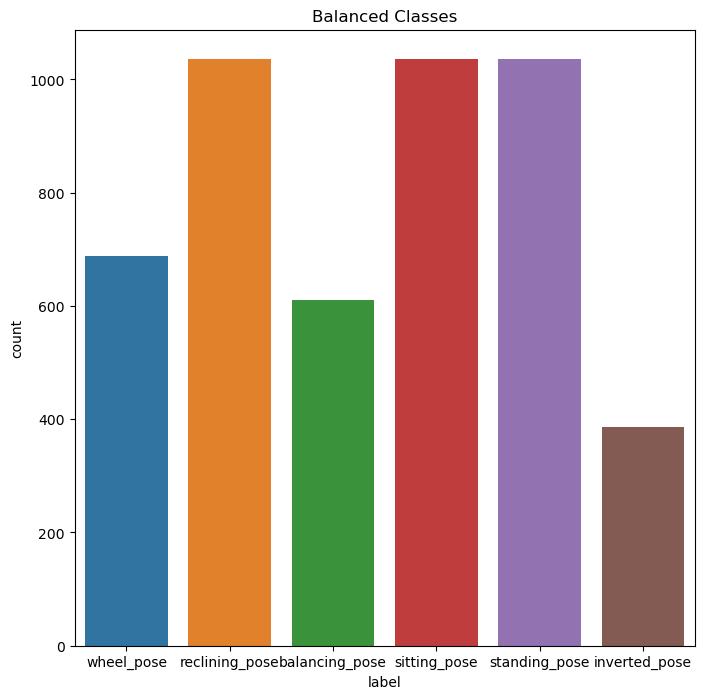

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
wheel_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'wheel_pose']
reclining_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'reclining_pose'].sample(n=1036,random_state = 2)
balancing_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'balancing_pose']
sitting_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'sitting_pose'].sample(n=1036,random_state = 2)
standing_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'standing_pose'].sample(n=1036,random_state = 2)
inverted_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'inverted_pose']
balanced_o_data = pd.concat([wheel_o_data, reclining_o_data, balancing_o_data, sitting_o_data, standing_o_data,inverted_o_data,])
plt.figure(figsize=(8, 8))
sns.countplot('label', data=balanced_o_data)
plt.title('Balanced Classes')
plt.show()

In [60]:
us_majority_data = balanced_o_data

In [68]:
pip install --upgrade pip

In [69]:
pip install -U "imbalanced-learn < 0.9"

Note: you may need to restart the kernel to use updated packages.


In [70]:
X_train_n = us_majority_data.drop(columns = "label")
y_train_n = us_majority_data['label']

In [71]:
X_train_n = us_majority_data.drop(columns = "label")
y_train_n = us_majority_data['label']

In [72]:
X_train_n.head()

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,-0.080943,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.161449,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.122305,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196
16,0.147042,0.110211,0.080966,0.999974,0.132291,0.089907,0.100831,0.999974,0.131374,0.090019,...,-0.203248,0.897517,0.937523,0.886455,-0.106377,0.598260,0.965695,0.899308,-0.346230,0.909870
22,0.236527,0.550357,-0.189080,0.996351,0.264407,0.546083,-0.164527,0.995161,0.267341,0.544944,...,-0.079953,0.603158,0.465415,0.674460,0.094545,0.330993,0.609429,0.658095,-0.233454,0.573105


In [73]:
y_train_n.head()

1     wheel_pose
3     wheel_pose
4     wheel_pose
16    wheel_pose
22    wheel_pose
Name: label, dtype: object

# Oversampling Minority class to 1036

C:\Users\ANUSHA REDDY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


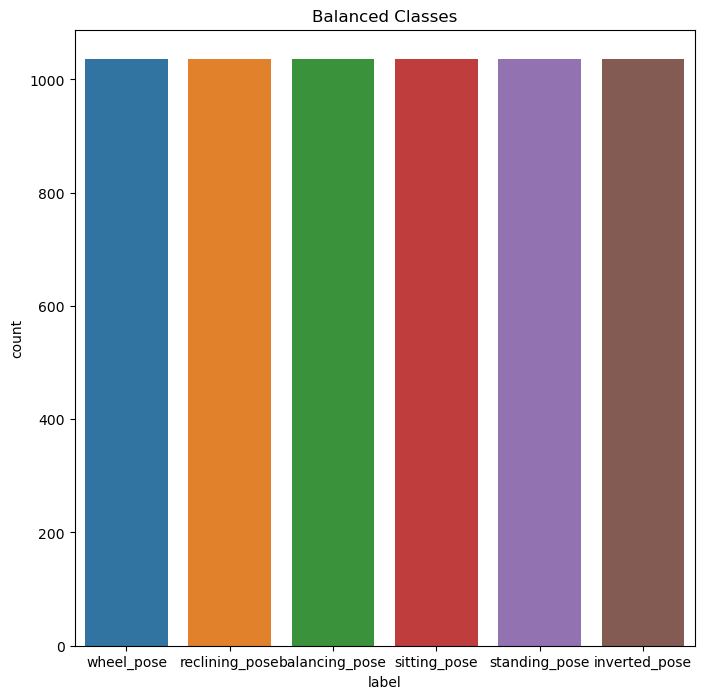

In [74]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
sm = SMOTE(sampling_strategy = 'auto', random_state = 5)
X, y = sm.fit_resample(X_train_n, y_train_n)
train_data = pd.concat([X, y], axis = 1)
plt.figure(figsize=(8, 8))
sns.countplot('label', data=train_data)
plt.title('Balanced Classes')
plt.show()

In [75]:
y.value_counts()

wheel_pose        1036
reclining_pose    1036
balancing_pose    1036
sitting_pose      1036
standing_pose     1036
inverted_pose     1036
Name: label, dtype: int64

# Train and Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [79]:
X_train.shape

(4972, 132)

In [80]:
X_test.shape

(1244, 132)

In [81]:
X_train

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
5021,0.365341,0.433058,-1.138296,0.999971,0.393183,0.378533,-1.137303,0.999983,0.408695,0.375379,...,0.056072,0.483213,0.876007,0.624979,-0.072707,0.672218,0.858780,0.701275,-0.097033,0.622068
2847,0.520539,0.177817,-0.396164,0.999999,0.539909,0.147958,-0.321255,0.999999,0.551149,0.147508,...,-0.589104,0.637851,0.092621,0.959399,-0.802274,0.768412,0.766185,0.970976,-0.774444,0.750611
6211,0.060037,0.192837,-0.147171,0.999935,0.069880,0.163653,-0.187318,0.999937,0.073482,0.162523,...,0.501683,0.809447,0.946005,0.917579,-0.039025,0.995296,0.929569,0.891964,0.469556,0.824192
5784,0.213925,0.899351,-0.448005,0.992523,0.231867,0.877386,-0.477512,0.995301,0.241773,0.874257,...,0.642091,0.090183,0.628270,0.706925,0.355068,0.287238,0.599929,0.772821,0.758736,0.091082
1351,0.208954,0.482881,0.013818,0.999974,0.179477,0.500100,0.039764,0.999971,0.178965,0.502517,...,0.133083,0.895395,0.897033,0.229582,0.271961,0.599834,0.900734,0.222936,0.236365,0.940827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.337274,0.141236,-0.050648,0.999901,0.356380,0.139332,-0.058851,0.999921,0.359193,0.141763,...,0.287774,0.752716,0.090658,0.468164,0.023806,0.957540,0.467548,0.505113,0.284587,0.668211
5191,0.900047,0.350020,-0.057381,0.999921,0.916075,0.310375,-0.021764,0.999910,0.914148,0.306334,...,0.219315,0.619751,0.149081,0.765561,0.383187,0.377159,0.123971,0.787504,0.359497,0.690389
5226,0.778641,0.867178,-0.036790,0.997730,0.821608,0.884065,-0.097919,0.999060,0.821935,0.890832,...,-0.247638,0.229415,0.675638,0.146494,-0.920072,0.791524,0.641537,0.139632,-0.583328,0.356336
5390,0.552449,0.778321,0.104254,0.998462,0.580599,0.793726,0.064698,0.997922,0.581155,0.800200,...,0.232671,0.140026,0.562459,0.148595,-0.062665,0.608624,0.611070,0.128171,0.134333,0.141100


In [82]:
X_test

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
2615,0.558151,0.135426,-0.295052,0.998813,0.516006,0.103483,-0.222201,0.998828,0.508790,0.102250,...,0.009784,0.161389,0.673186,0.841579,0.606088,0.148721,0.936863,0.862723,0.309622,0.110917
1872,0.350047,0.302656,0.003389,0.999663,0.339522,0.256621,-0.046446,0.999620,0.342214,0.252411,...,0.702009,0.568807,0.086821,0.498429,-0.049497,0.865999,0.096871,0.456355,0.553415,0.618344
2552,0.609179,0.206935,-0.393345,0.999998,0.625267,0.178287,-0.382850,0.999998,0.634410,0.177171,...,-0.176682,0.823539,0.208534,0.921418,-0.841931,0.988669,0.657733,0.514328,-0.259817,0.764083
4155,0.457501,0.779864,-0.496546,0.999976,0.466464,0.800381,-0.574753,0.999979,0.474983,0.799405,...,0.358722,0.987618,0.939181,0.802604,0.108264,0.992797,0.053000,0.814312,0.172072,0.989673
996,0.229481,0.043957,-0.091740,0.999933,0.250097,0.043815,-0.110477,0.999947,0.253415,0.049544,...,0.496906,0.667352,0.976941,0.940789,-0.255534,0.981934,0.939657,0.917445,0.395485,0.661462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,0.404883,0.188504,-0.361309,0.999102,0.378387,0.220661,-0.326133,0.999573,0.380084,0.223244,...,-0.295691,0.927343,0.501832,0.668953,0.999531,0.435727,0.226472,0.247748,-0.276740,0.939905
336,0.811130,0.410452,0.037993,0.999672,0.833188,0.428492,0.053264,0.999626,0.834658,0.426760,...,-0.149140,0.978657,0.145834,0.911906,0.165119,0.302727,0.064544,0.918769,-0.131298,0.962358
5445,0.526126,0.799439,-0.279756,0.995691,0.593766,0.795114,-0.176259,0.995159,0.596754,0.793220,...,-0.049319,0.904663,0.367177,0.047881,0.902484,0.560337,0.332563,0.030543,-0.545042,0.833862
2168,0.528739,0.198897,-2.561337,0.999961,0.570495,0.160687,-2.501188,0.999977,0.592632,0.160157,...,-0.548034,0.702597,0.569138,0.686911,-0.944016,0.817793,0.577789,0.709106,-0.896899,0.783943


In [83]:
y_train.shape

(4972,)

In [84]:
y_test.shape

(1244,)

In [85]:
y_train.value_counts()

standing_pose     854
sitting_pose      835
inverted_pose     832
reclining_pose    826
balancing_pose    819
wheel_pose        806
Name: label, dtype: int64

In [86]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [87]:
knn_acc = accuracy_score(y_test, knn_pred)

In [88]:
knn_acc

0.9003215434083601

In [89]:
confusion_matrix(y_test,knn_pred)

array([[209,   2,   3,   2,   1,   0],
       [  3, 198,   2,   1,   0,   0],
       [ 11,   6, 178,   8,   2,   5],
       [ 24,   2,   9, 152,   6,   8],
       [  5,   1,   2,   7, 166,   1],
       [  3,   2,   5,   3,   0, 217]], dtype=int64)

In [90]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

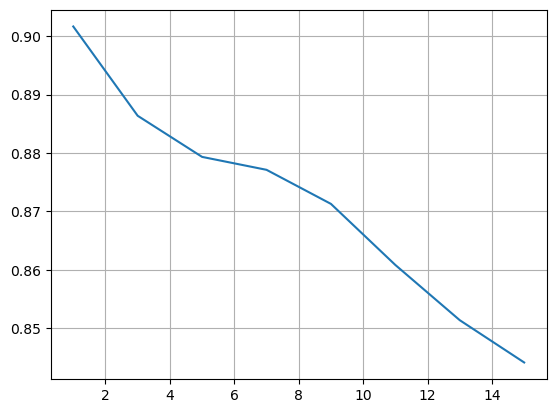

In [91]:
x_axis = []
y_axis = []
for i in range(1, 16, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf, X_train, y_train)
    x_axis.append(i)
    y_axis.append(score.mean())
    
plt.plot(x_axis,y_axis)
plt.grid()
plt.show()

In [92]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
knn1_acc = accuracy_score(y_test, knn1_pred)

In [93]:
knn1_acc

0.9043408360128617

In [94]:
confusion_matrix(y_test,knn1_pred)

array([[202,   1,   4,   9,   1,   0],
       [  0, 201,   1,   1,   1,   0],
       [  4,   3, 178,  14,   3,   8],
       [ 18,   2,   7, 156,   8,  10],
       [  2,   0,   2,   8, 168,   2],
       [  2,   0,   3,   3,   2, 220]], dtype=int64)

# Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, gnb_pred)

In [96]:
confusion_matrix(y_test,gnb_pred)

array([[ 78,  10,  65,  34,   4,  26],
       [  1, 176,  21,   2,   0,   4],
       [  4,   8, 113,  14,  14,  57],
       [ 12,   2,  26, 122,  21,  18],
       [  4,   7,  31,   8, 120,  12],
       [  9,   3,  75,   7,  16, 120]], dtype=int64)

In [97]:
gnb_acc

0.5860128617363344

# Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

In [99]:
confusion_matrix(y_test,dt_pred)

array([[171,   4,   8,  16,  13,   5],
       [  1, 186,   3,   5,   4,   5],
       [  9,  10, 133,  23,  14,  21],
       [ 16,   3,  19, 147,  11,   5],
       [  6,   2,   6,  13, 151,   4],
       [  4,   2,  15,   6,  10, 193]], dtype=int64)

In [100]:
dt_acc

0.7885852090032154

# RandomForest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)
rf1_pred = rf1.predict(X_test)
rf1_acc = accuracy_score(y_test, rf1_pred)

In [102]:
confusion_matrix(y_test,rf1_pred)

array([[194,   3,   6,   8,   6,   0],
       [  0, 197,   4,   3,   0,   0],
       [  8,   6, 179,  11,   3,   3],
       [ 11,   1,  11, 173,   3,   2],
       [  3,   1,   3,   2, 173,   0],
       [  4,   2,   8,   3,   5, 208]], dtype=int64)

In [103]:
rf1_acc

0.9035369774919614

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=1000, random_state=42)
rf2.fit(X_train, y_train)
rf2_pred = rf2.predict(X_test)
rf2_acc = accuracy_score(y_test, rf2_pred)

In [105]:
confusion_matrix(y_test,rf2_pred)

array([[194,   3,   6,   7,   7,   0],
       [  0, 198,   4,   2,   0,   0],
       [  8,   6, 182,   9,   2,   3],
       [ 11,   2,  13, 172,   1,   2],
       [  3,   1,   3,   2, 173,   0],
       [  4,   1,   9,   2,   5, 209]], dtype=int64)

In [106]:
rf2_acc

0.9067524115755627

In [107]:
rf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [108]:
rf3 = RandomForestClassifier(n_estimators=1500, random_state=42)
rf3.fit(X_train, y_train)
rf3_pred = rf3.predict(X_test)
rf3_acc = accuracy_score(y_test, rf3_pred)

In [109]:
confusion_matrix(y_test,rf3_pred)

array([[194,   3,   6,   7,   7,   0],
       [  0, 198,   4,   2,   0,   0],
       [  9,   6, 181,   9,   2,   3],
       [ 11,   2,  13, 172,   1,   2],
       [  3,   1,   3,   2, 173,   0],
       [  4,   2,   8,   2,   5, 209]], dtype=int64)

In [110]:
rf3_acc

0.9059485530546624

In [111]:
rf3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [112]:
rf4 = RandomForestClassifier(n_estimators=2000, random_state=42)
rf4.fit(X_train, y_train)
rf4_pred = rf4.predict(X_test)
rf4_acc = accuracy_score(y_test, rf4_pred)

In [113]:
confusion_matrix(y_test,rf4_pred)

array([[194,   3,   6,   7,   7,   0],
       [  0, 198,   4,   2,   0,   0],
       [  9,   6, 182,   9,   2,   2],
       [ 11,   2,  13, 172,   1,   2],
       [  3,   1,   3,   2, 173,   0],
       [  4,   2,   8,   2,   5, 209]], dtype=int64)

In [114]:
rf4_acc

0.9067524115755627

# Ridge Classifier

In [115]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_acc = accuracy_score(y_test,ridge_pred)

In [116]:
confusion_matrix(y_test,ridge_pred)

array([[178,  10,   3,  19,   1,   6],
       [  2, 192,   1,   7,   1,   1],
       [ 23,  36,  56,  22,  28,  45],
       [ 22,   2,   7, 135,  19,  16],
       [  4,   9,   0,   4, 162,   3],
       [  4,  21,  28,   9,   9, 159]], dtype=int64)

In [117]:
ridge_acc

0.7090032154340836

# Support Vector Classifier

In [118]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf7 = SVC()
grid = {'C':[1,2,3,4,5,10,15,19], 
        'kernel':['rbf'],
       'decision_function_shape':['ovo', 'ovr']}
abc = GridSearchCV(clf7, grid)
abc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 15, 19],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['rbf']})

In [119]:
abc.best_estimator_

SVC(C=19, decision_function_shape='ovo')

In [120]:
clf8 = SVC(C=19, decision_function_shape='ovo', kernel='rbf')
clf8.fit(X_train, y_train)
clf8.score(X_test, y_test)

0.9180064308681672

In [121]:
clf8.get_params()

{'C': 19,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Multi Layer Perceptron

In [122]:
from sklearn.neural_network import MLPClassifier

In [123]:
h = []
for i in range(0,200):
    h.append(150)
h = tuple(h)
alg_model = MLPClassifier(hidden_layer_sizes=h, 
                              activation='relu', 
                              solver='lbfgs', 
                              batch_size=100)

In [124]:
alg_model.fit(X_train,y_train)
y_pred_mlp=alg_model.predict(X_test)

In [125]:
alg_model.score(X_test, y_test)

0.14630225080385853

# Bagging Classifier

In [126]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
model.predict(X_test)

array(['sitting_pose', 'balancing_pose', 'standing_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [127]:
model.score(X_test, y_test)

0.8794212218649518

In [128]:
model.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# GradientBoosting Classifier

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

clf11 = GradientBoostingClassifier(random_state = 2)
clf11.fit(X_train, y_train)
clf11.predict(X_test)

array(['sitting_pose', 'balancing_pose', 'sitting_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [130]:
clf11.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 2,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_draw = mp.solutions.drawing_utils

X = df.iloc[:, 1:-1]

# Get input image file path from user
path = input("Enter the path of the image file (jpg, jpeg, png): ")

# Read image and convert to RGB format
try:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    print("Invalid file format")
    exit()

# Process image and get pose landmarks
results = pose.process(img)
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    temp = []
    for j in landmarks:
        temp = temp + [j.x, j.y, j.z, j.visibility]
    # Predict pose using SVM model
    pose_label = rf1.predict([temp])[0]
    # Draw pose landmarks on image
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0, 0, 255), thickness=8, circle_radius=4),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=8, circle_radius=4))
    # Assign pose name based on predicted label
    pose_names = {'balancing_pose': 'Balancing Pose', 'inverted_pose': 'Inverted Pose',
                  'reclining_pose': 'Reclining Pose', 'sitting_pose': 'Sitting Pose',
                  'standing_pose': 'Standing Pose', 'wheel_pose': 'Wheel Pose'}
    pose_name = pose_names.get(pose_label, "Unknown")
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.title(pose_name)
    plt.axis('off')
    plt.show()
else:
    print("No pose landmarks detected in the image")


In [ ]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_draw = mp.solutions.drawing_utils



# Get input image file path from user
path = input("Enter the path of the image file (jpg, jpeg, png): ")

# Read image and convert to RGB format
try:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    print("Invalid file format")
    exit()

# Process image and get pose landmarks
results = pose.process(img)
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    temp = []
    for j in landmarks:
        temp = temp + [j.x, j.y, j.z, j.visibility]
    # Predict pose using SVM model
    pose_label = clf8.predict([temp])[0]
    # Draw pose landmarks on image
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0, 255, 0), thickness=8, circle_radius=4),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=8, circle_radius=4))
    # Assign pose name based on predicted label
    pose_names = {'balancing_pose': 'Balancing Pose', 'inverted_pose': 'Inverted Pose',
                  'reclining_pose': 'Reclining Pose', 'sitting_pose': 'Sitting Pose',
                  'standing_pose': 'Standing Pose', 'wheel_pose': 'Wheel Pose'}
    pose_name = pose_names.get(pose_label, "Unknown")
    # Display image with pose label and landmarks
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.title(pose_name,fontsize=30)
    plt.axis('off')
    plt.show()
else:
    print("No pose landmarks detected in the image")


In [ ]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_draw = mp.solutions.drawing_utils



# Get input image file path from user
path = input("Enter the path of the image file (jpg, jpeg, png): ")

# Read image and convert to RGB format
try:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    print("Invalid file format")
    exit()

# Process image and get pose landmarks
results = pose.process(img)
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    temp = []
    for j in landmarks:
        temp = temp + [j.x, j.y, j.z, j.visibility]
    # Predict pose using SVM model
    pose_label = clf8.predict([temp])[0]
    # Draw pose landmarks on image
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0, 255, 0), thickness=8, circle_radius=4),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=8, circle_radius=4))
    # Assign pose name based on predicted label
    pose_names = {'balancing_pose': 'Balancing Pose', 'inverted_pose': 'Inverted Pose',
                  'reclining_pose': 'Reclining Pose', 'sitting_pose': 'Sitting Pose',
                  'standing_pose': 'Standing Pose', 'wheel_pose': 'Wheel Pose'}
    pose_name = pose_names.get(pose_label, "Unknown")
    # Display image with pose label and landmarks
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.title(pose_name,fontsize=30)
    plt.axis('off')
    plt.show()
else:
    print("No pose landmarks detected in the image")
